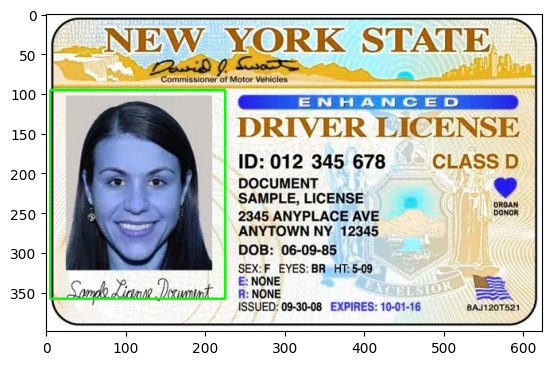

In [8]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import sys , os
from pathlib import Path

CV_DIR = Path(cv.__file__).resolve().parent
BASE_DIR = Path(sys.path[0])
DATA_DIR = CV_DIR / 'data'

def detect_face(image,data_dir = str(DATA_DIR),  x_eps=0.3, y_eps=0.45):
    """
        Detect and return (x,y,w,h) of the wider face on an image
        x,y - top left position of detected face rectangle
        w,h - width and height
        Raise an IndexError when no face detected

        Before use, make sure to provide openCv trained models directory (defaut is ./data/)
    """
    gray = cv.cvtColor(image,cv.COLOR_BGR2GRAY)
    face_cascade_model_file = os.path.join(data_dir,'haarcascade_frontalface_alt.xml')
    face_cascade = cv.CascadeClassifier(face_cascade_model_file)
    faces = face_cascade.detectMultiScale(
        gray,
        scaleFactor=1.1,
        minNeighbors=5,
        minSize=(30, 30),
        flags = cv.CASCADE_SCALE_IMAGE
    )
    if len(faces) != 0:
        if len(faces) > 1:
            faces = sorted(faces, key = lambda face : face[2] * face[3], reverse=True)
        
        # image_width = image.shape[1]
        # image_height = image.shape[0]
        
        x,y,w,h = faces[0]
        x -= int(x_eps*w)
        y -= int(y_eps*h)
        w = int(w*(1+2*x_eps))
        h = int(h*(1+2*y_eps))
        return (x,y,w,h)

    else:
        raise IndexError('No relevant face detected')
        

def draw_dectected_face(image):
    """
    """
    x, y, w, h = detect_face(image)
    # image[y:y+h, x:x+w] = 0
    cv.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)

    plt.imshow(image)
image = cv.imread('inputs/cards/card1.jpg')
draw_dectected_face(image)

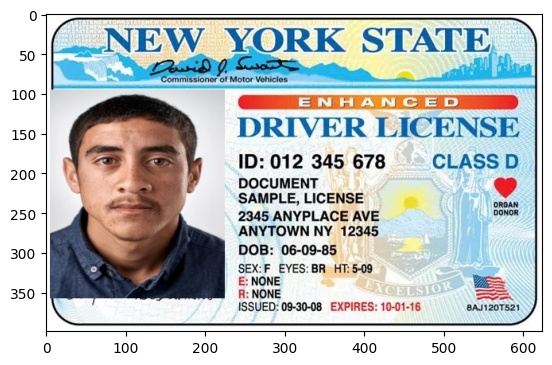

In [9]:
source = cv.imread('inputs/cards/card1.jpg')
target = cv.imread('inputs/targets/target2.jpg')

def replace_face(source,target):
    """
        Detect and replace unique relevant face in source by target image
        return source with replaced face
    """
    source_copy = source.copy()
    x,y,w,h = detect_face(source_copy)
    resized_target = cv.resize(target,(w,h),interpolation = cv.INTER_AREA)
    source_copy[y:y+h,x:x+w] = resized_target[0:h,0:w]
    return source_copy

replaced = replace_face(source,target)
plt.imshow(cv.cvtColor(replaced,cv.COLOR_RGB2BGR))

# inputs_dir = BASE_DIR / 'inputs'
# output_dir = BASE_DIR / 'outputs'

# os.makedirs(output_dir, exist_ok=True)
# cards_dir = inputs_dir / 'cards'
# target_dir = inputs_dir / 'targets'

# for s_file in cards_dir.iterdir():
#     print(s_file)
#     source = cv.imread(str(s_file))
#     i = 0
#     for t_file in target_dir.iterdir():
#         target = cv.imread(str(t_file))

#         try:
#             replaced = replace_face(source,target)
#             cv.imwrite(os.path.join(output_dir,f'{i}replaced_{s_file.name}'),replaced)
#             i += 1
#             print(f'Replacement on {s_file.name} succeded!')
#         except:
#             print(f'Replacement on {s_file.name} failed!')
